# Adidas Sales in United States

## Dataset from [Kaggle](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset/data)

## About Dataset
An Adidas sales dataset is a collection of data that includes information on the sales of Adidas products. This type of dataset may include details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information.

Adidas sales data can be useful for a variety of purposes, such as analyzing sales trends, identifying successful products or marketing campaigns, and developing strategies for future sales. It can also be used to compare Adidas sales to those of competitors, or to analyze the effectiveness of different marketing or sales channels.

There are a variety of sources that could potentially provide an Adidas sales dataset, including Adidas itself, market research firms, government agencies, or other organizations that track sales data. The specific data points included in an Adidas sales dataset may vary depending on the source and the purpose for which it is being used.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
# read the data
df = pd.read_excel("Adidas US Sales Datasets.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


## Data Cleaning

In [3]:
# drop the first column
df = df.drop("Unnamed: 0", axis=1)

In [4]:
# drop first three rows
df = df.drop(labels = [0,1,2], axis=0)

In [5]:
# rename the columns
df.columns = df.iloc[0]

In [6]:
df = df.drop(labels=3, axis=0)

In [7]:
df = df.reset_index(drop = True)

In [8]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


## Inspection of Dataset

### shape of dataset

In [9]:
df.shape

(9648, 13)

### columns

In [10]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

### check missing values

In [11]:
df.isna().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


### convert columns to the appropriate data type

In [13]:
# Invoice Date
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format="%y-%m-%d")

In [14]:
# Price per unit
df['Price per Unit'] = df['Price per Unit'].astype(int)

In [15]:
# Units Sold
df['Units Sold'] = df['Units Sold'].astype(int)

In [16]:
# Total Sales
df['Total Sales'] = df['Total Sales'].astype(int)

In [17]:
# operating profit
df['Operating Profit'] = df['Operating Profit'].astype(float)

In [18]:
# operating margin
df['Operating Margin'] = df['Operating Margin'].astype(float)

### Describe the data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int32         
 8   Units Sold        9648 non-null   int32         
 9   Total Sales       9648 non-null   int32         
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 866.9+ KB


In [20]:
df.describe()

3,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.182214,256.930037,93273.403089,34425.244761,0.422991
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,NaN,14.698080,214.252030,141915.997157,54193.113713,0.097197


## Data Analysis
1. Which product category has the highest total sales?
2. Which retailer has the highest total sales?
3. How do sales of specific products vary across different retailers?
4. What are the top selling products for each region?
5. Which sales method yields the highest average total sales?
6. Which sales method generates the highest total operating profit?
7. What is the distribution of product prices?
8. How do sales vary between different states or cities?
9. How do sales performance metrics (e.g. total sales) change over time?
10. Is there a relationship between units sold and total sales?

In [21]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


### 1. Which product category has the highest total sales?

In [22]:
# Product Category with the highest total sales
# Group by Product then calculate the sum of Units Sold
top_product = df.groupby('Product').agg({ "Units Sold": "sum"}).sort_values(by = "Units Sold", ascending=False).reset_index()
top_product

3,Product,Units Sold
0,Men's Street Footwear,593320
1,Men's Athletic Footwear,435526
2,Women's Apparel,433827
3,Women's Street Footwear,392269
4,Women's Athletic Footwear,317236
5,Men's Apparel,306683


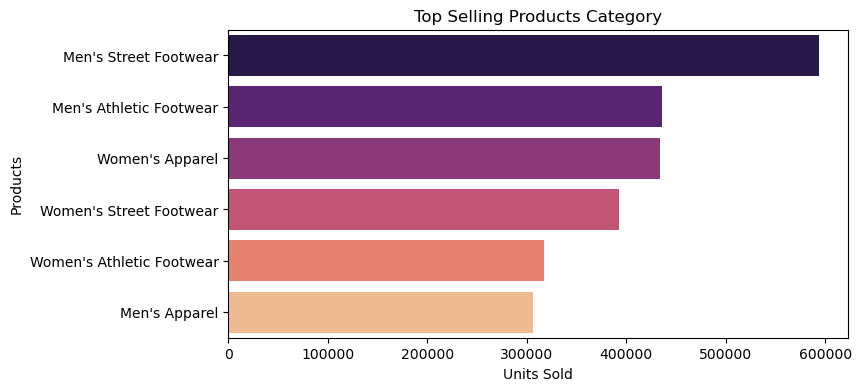

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(y=top_product["Product"], x=top_product["Units Sold"], hue=top_product["Product"], palette="magma")
plt.title("Top Selling Products Category")
plt.xlabel("Units Sold")
plt.ylabel("Products")
plt.show()

Based on the data, Men's street footware is the highest selling product category, followed closely by Men's Althetic Footwear, and Women's Apparel.

### 2. Which retailer has the highest total sales?

In [24]:
# Group by Retailer, then find the sum of total sales
top_retailer = df.groupby('Retailer').agg({"Total Sales": "sum"}).sort_values(by="Total Sales", ascending=False).reset_index()
top_retailer

3,Retailer,Total Sales
0,West Gear,242964261
1,Foot Locker,220094606
2,Sports Direct,182470917
3,Kohl's,102114724
4,Amazon,77698884
5,Walmart,74558401


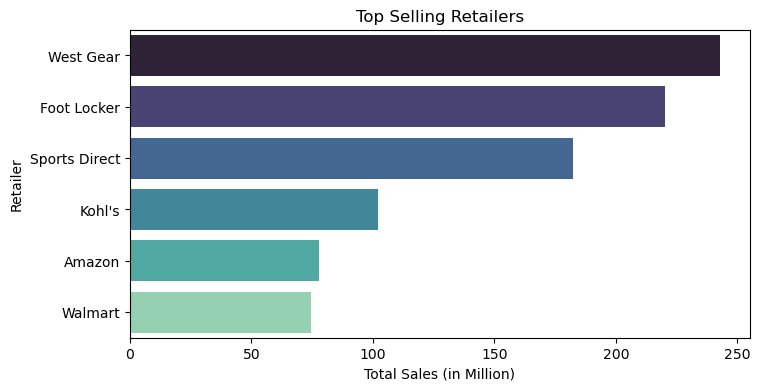

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(y=top_retailer['Retailer'], 
            x=top_retailer['Total Sales'] / 1000000, 
            hue=top_retailer['Retailer'], 
            palette='mako')
plt.title('Top Selling Retailers')
plt.ylabel('Retailer')
plt.xlabel('Total Sales (in Million)')
plt.show()

### 3. How do sales of specific products vary across different retailers?

In [43]:
# Group by Retailer and Product, then get the sum of total sales

retailer_product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum().reset_index()
retailer_product_sales

,Retailer,Product,Total Sales
0,Amazon,Men's Apparel,10474760
1,Amazon,Men's Athletic Footwear,12011959
2,Amazon,Men's Street Footwear,22161645
3,Amazon,Women's Apparel,15710637
4,Amazon,Women's Athletic Footwear,7935246
5,Amazon,Women's Street Footwear,9404637
6,Foot Locker,Men's Apparel,29508956
7,Foot Locker,Men's Athletic Footwear,36480412
8,Foot Locker,Men's Street Footwear,57481548
9,Foot Locker,Women's Apparel,43296080


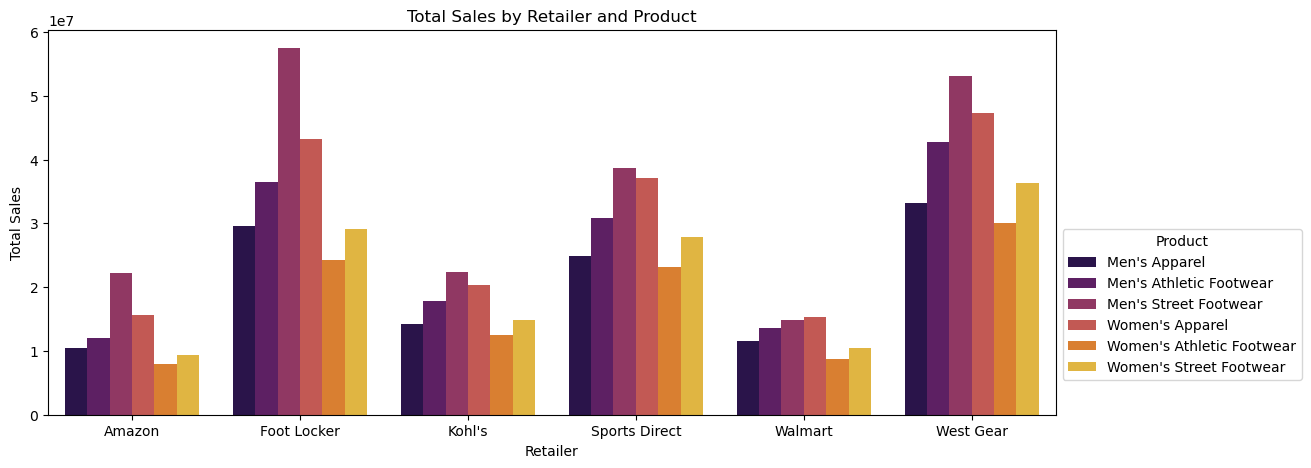

In [27]:
plt.figure(figsize=(13,5))
sns.barplot(x='Retailer', y='Total Sales', hue='Product', data=retailer_product_sales, palette='inferno')
plt.title('Total Sales by Retailer and Product')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.legend(title='Product', bbox_to_anchor=(1,0.5))
plt.show()

### 4. What are the top selling products for each region?

In [42]:
# Group by Region and Product, then calculate the sum of Total sales

sales_by_region = df.groupby(['Region', 'Product'])['Total Sales'].sum().reset_index()
sales_by_region

,Region,Product,Total Sales
0,Midwest,Men's Apparel,18125618
1,Midwest,Men's Athletic Footwear,21305539
2,Midwest,Men's Street Footwear,38322793
3,Midwest,Women's Apparel,28206342
4,Midwest,Women's Athletic Footwear,13595154
5,Midwest,Women's Street Footwear,16244898
6,Northeast,Men's Apparel,25744371
7,Northeast,Men's Athletic Footwear,28874237
8,Northeast,Men's Street Footwear,51024984
9,Northeast,Women's Apparel,37543055


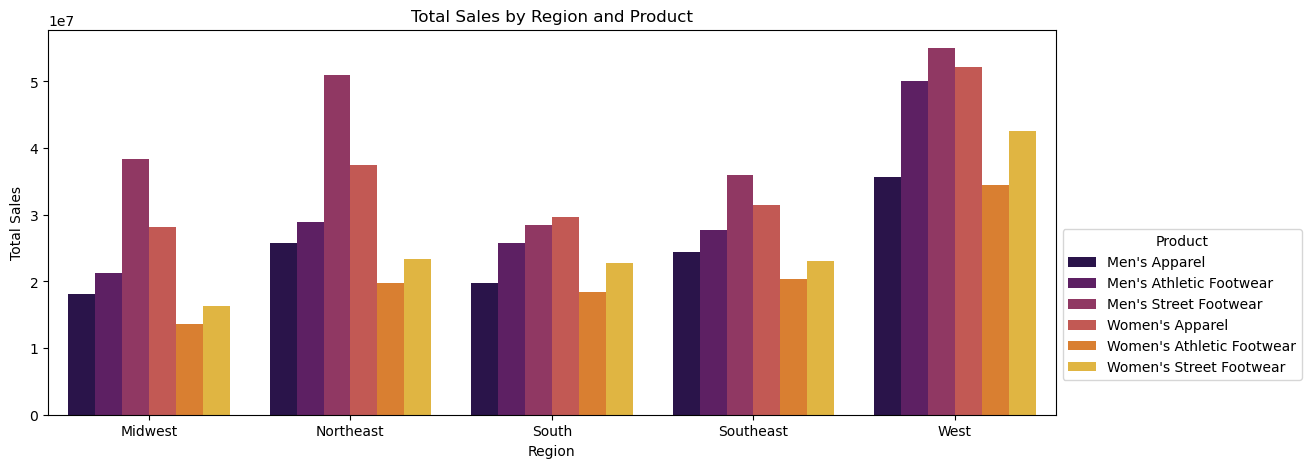

In [29]:
plt.figure(figsize=(13,5))
sns.barplot(data=sales_by_region, x='Region', y='Total Sales', hue='Product', palette='inferno')
plt.title('Total Sales by Region and Product')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Product', bbox_to_anchor=(1,0.5))
plt.show()

After addressing the questions and conducting the analysis, we found notable variations in product sales across different retailers and regions. Specifically, the data revealed that men's street footwear emerged as the leading product category across multiple retailers including Amazon, Footlocker, Kohl's, Sports Direct, and West Gear. Conversely, women's apparel demonstrated dominance in sales specifically at Walmart.

Furthermore, upon plotting the top-selling products for each region, it became evident that men's street footwear consistently ranked as the highest-selling product category across the Midwest, Northeast, Southeast, and West regions. Conversely, women's apparel emerged as the top-selling product only in the South region.

These findings underscore the importance of understanding the nuanced preferences of consumers across various demographics and geographic locations, which can inform strategic decision-making processes for retailers aiming to optimize their product offerings and market penetration strategies.

### 5. Which sales method yields the highest average total sales?

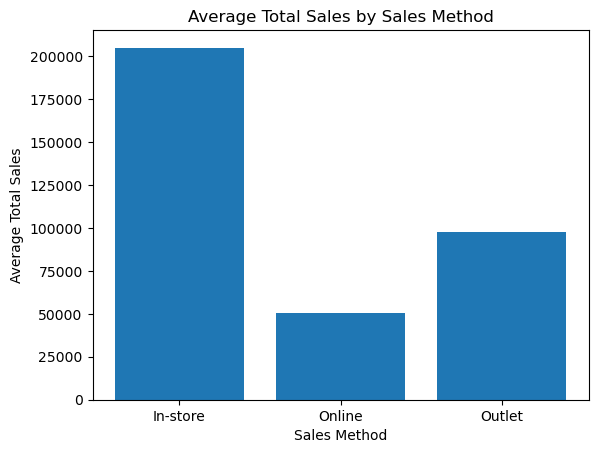

In [47]:
# Group the data by Sales Method and calculate the Average Total Sales for each group
sales_by_method = df.groupby('Sales Method')['Total Sales'].mean()

# Retrieve the data into seperate lists
sales_methods = []
avg_total_sales = []

# Iterate through the groupby object and extract the values
for method, sales in sales_by_method.items():
    sales_methods.append(method)
    avg_total_sales.append(sales)

# Create the plot
fig, ax = plt.subplots()
ax.bar(sales_methods, avg_total_sales)
ax.set_xlabel('Sales Method')
ax.set_ylabel('Average Total Sales')
ax.set_title('Average Total Sales by Sales Method')
plt.show()

### 6. Which sales method generates the highest total operating profit?

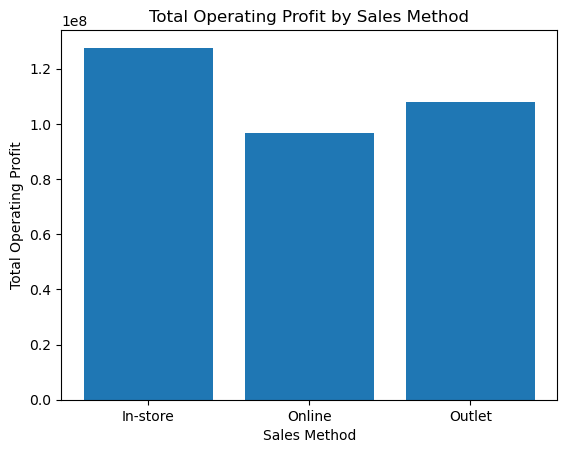

In [31]:
# Group the data by Sales Method and calculate the total Operating Profit for each group
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()

# Extract the data into separate lists
sales_methods = []
total_profits = []

# Iterate through the groupby object and extract the values
for method, profit in profit_by_method.items():
    sales_methods.append(method)
    total_profits.append(profit)
    
# Create the plot
fig, ax = plt.subplots()
ax.bar(sales_methods, total_profits)

# Add axis labels and a title
ax.set_xlabel('Sales Method')
ax.set_ylabel('Total Operating Profit')
ax.set_title('Total Operating Profit by Sales Method')

# Show the plot
plt.show()

Based on the data, it is evident that the In-store sales methid has the highest total operating profit, followed by the Outlet and Online sales method. This indicates that the In-store sales approach demonstrates superior effectiveness in generating operating profit. However, it's essential to acknowledge that additional factors, such as sales volume and associated costs, could also influence overall operating profit. It may be helpful to further analyze the data to better understand the differences in performance between the various sales methods.

### 7. What is the distribution of product prices?

<Axes: title={'center': 'Product Price distribution'}, ylabel='Frequency'>

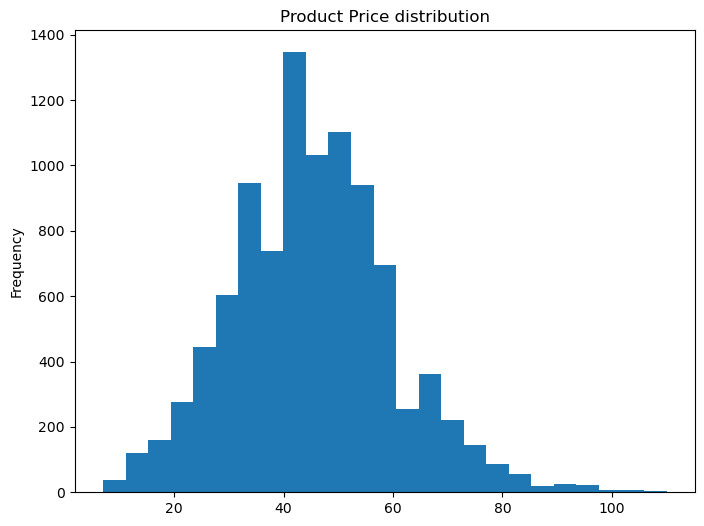

In [33]:
df['Price per Unit'].plot(kind="hist", figsize=(8,6), bins=25, title='Product Price distribution')

#### overall average price

In [52]:
# overall average mean price

df['Price per Unit'].mean()

45.18221393034826

**The price range is mostly between 40 to 60.**
**The overall average price of the product is $45.18**

### 8. How do sales vary between different states or cities?

In [34]:
top_ten_states = df.groupby('State').agg({"Total Sales": "sum"}).sort_values(by="Total Sales", ascending=False).reset_index().iloc[:10]
top_ten_states

3,State,Total Sales
0,New York,64229039
1,California,60174133
2,Florida,59283710
3,Texas,46359744
4,South Carolina,29285633
5,Washington,26330715
6,North Carolina,23956526
7,Louisiana,23750780
8,Hawaii,22282451
9,Virginia,21575034


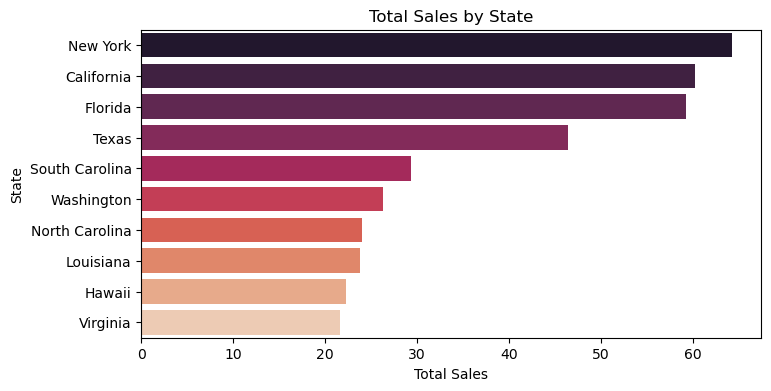

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_ten_states['Total Sales'] / 1000000, y=top_ten_states['State'],
           hue=top_ten_states['State'], palette="rocket")
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.grid(False)

In [36]:
top_ten_cities = df.groupby('City').agg({"Total Sales": "sum"}).sort_values(by="Total Sales", ascending=False).reset_index().iloc[:10]
top_ten_cities

3,City,Total Sales
0,Charleston,39974783
1,New York,39801235
2,San Francisco,34539220
3,Miami,31600863
4,Portland,30545637
5,Orlando,27682847
6,Seattle,26330715
7,Los Angeles,25634913
8,Houston,25456882
9,Albany,24427804


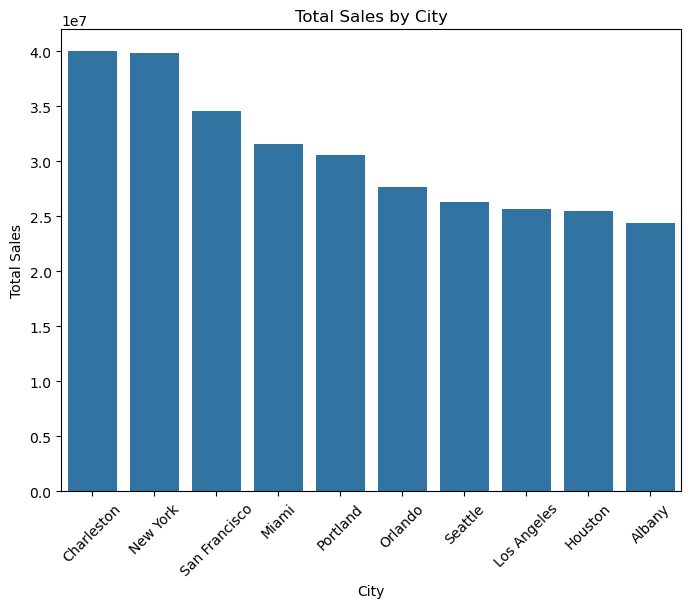

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_ten_cities, x="City", y="Total Sales")
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(False)

### 9. How do sales performance metrics (e.g. total sales) change over time?

In [38]:
# Group by month and aggregate sales metrics

monthly_sales = df[['Invoice Date', 'Total Sales']].set_index('Invoice Date').resample('M').sum()

monthly_sales

3,Total Sales
Invoice Date,
2020-01-31,16253742
2020-02-29,14997988
2020-03-31,17660574
2020-04-30,24607005
2020-05-31,16918014
2020-06-30,8829816
2020-07-31,17146013
2020-08-31,19877980
2020-09-30,18304436


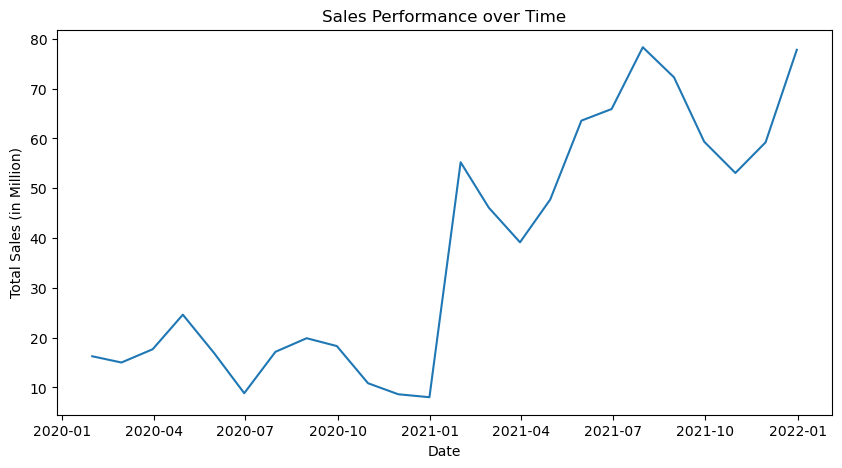

In [50]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales['Total Sales'] / 1000000)
plt.title('Sales Performance over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (in Million)')
plt.show()

### 10. Is there a relationship between units sold and total sales?

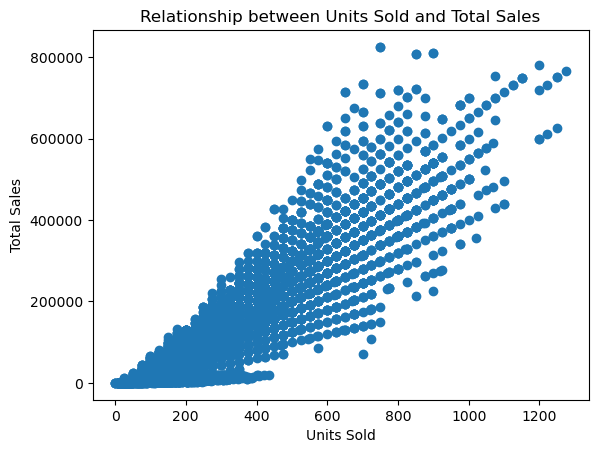

In [51]:
# Extract the data into separate lists
units_sold = df['Units Sold']
total_sales = df['Total Sales']

# Create the plot
fig, ax = plt.subplots()
ax.scatter(units_sold, total_sales)
ax.set_title('Relationship between Units Sold and Total Sales')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Units Sold')
plt.show()

The scatter plot illustrates the relationship between units sold and total sales. As we observe the plot, there appears to be a positive relationship between the two variables, indicating that as the number of units sold increases, the total sales also tend to increase. This relationship suggests that higher sales volumes are associated with higher total revenue generated. This insight can be valuable for businesses in understanding and predicting sales performance based on the volume of products sold.